In [1]:
import os
import sys
import warnings
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, load_breast_cancer
from sklearn.svm import SVC
from ml_lib import KernelizedSVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


In [3]:
def plot_decision_boundary(clf, X, y, ax, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    colors = ['blue', 'red']

    for val in np.unique(y):
        ax.scatter(X[y == val, 0], X[y == val, 1], c=colors[val], label=f'Class {val}', edgecolor='k')
    
    ax.set_title(title)
    ax.legend()

=== linear kernel accuracy ===
Custom KernelizedSVC accuracy: 0.87
Sklearn SVC accuracy: 0.87
=== poly kernel accuracy ===
Custom KernelizedSVC accuracy: 0.91
Sklearn SVC accuracy: 0.91
=== rbf kernel accuracy ===
Custom KernelizedSVC accuracy: 0.97
Sklearn SVC accuracy: 0.97


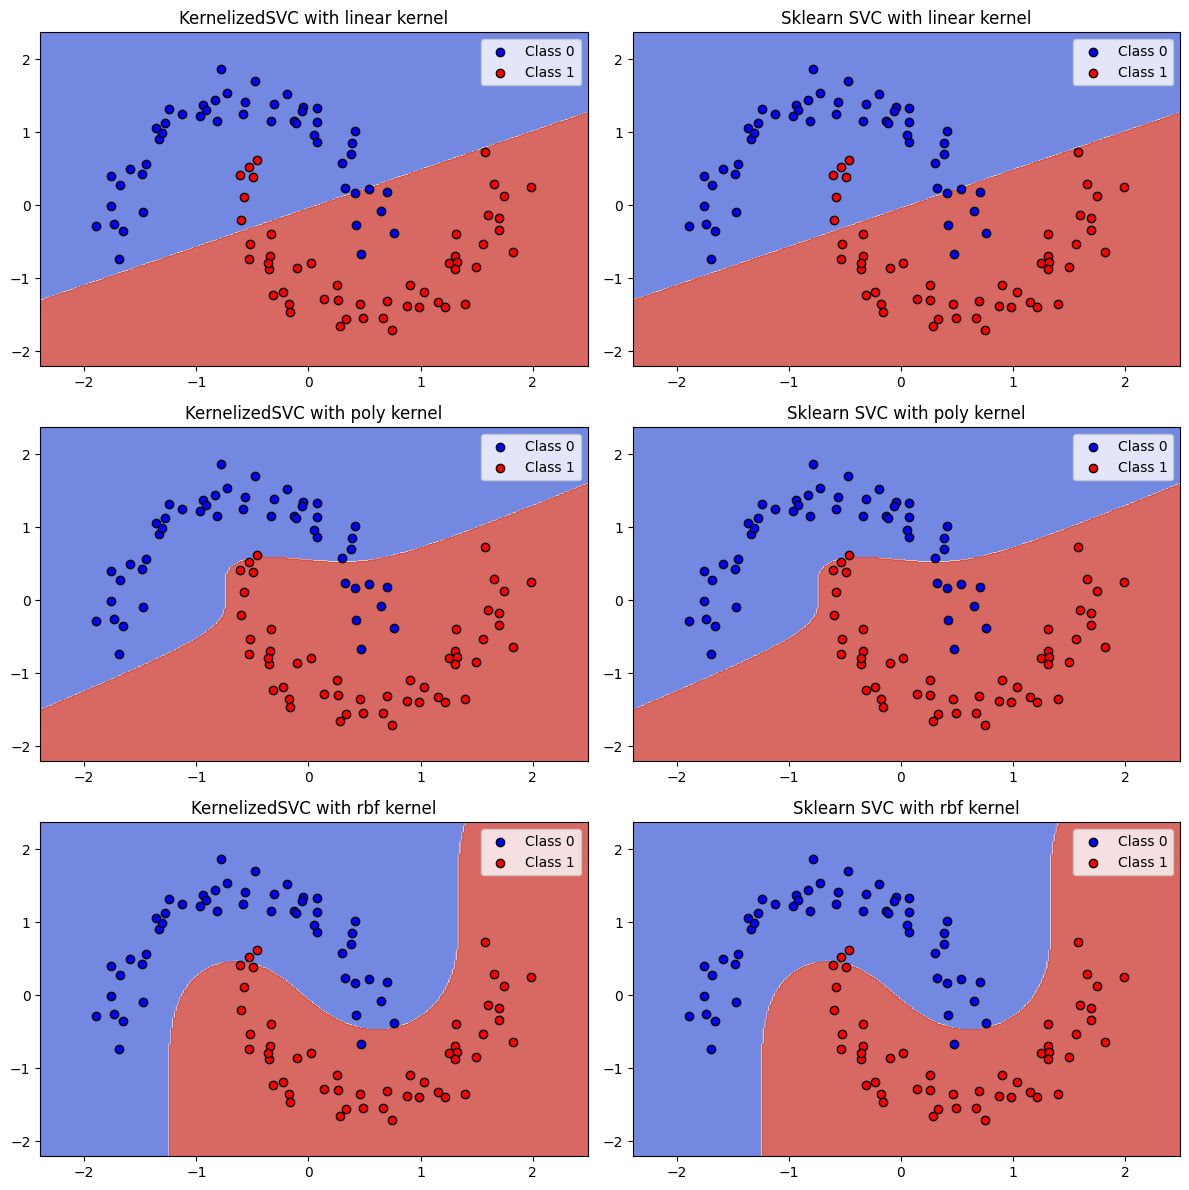

In [4]:
X, y = make_moons(n_samples=100, noise=0.1, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kernels = ['linear', 'poly', 'rbf']

fig, axes = plt.subplots(3, 2, figsize=(12, 12))

for row_axes, kernel in zip(axes, kernels):
    csvc = KernelizedSVC(kernel=kernel)
    svc = SVC(kernel=kernel)

    csvc.fit(X_scaled, y)
    svc.fit(X_scaled, y)

    y_pred_csvc = csvc.predict(X_scaled)
    y_pred_svc = svc.predict(X_scaled)

    plot_decision_boundary(csvc, X_scaled, y, row_axes[0], f'KernelizedSVC with {kernel} kernel')
    plot_decision_boundary(svc, X_scaled, y, row_axes[1], f'Sklearn SVC with {kernel} kernel')

    print(f"=== {kernel} kernel accuracy ===")
    print("Custom KernelizedSVC accuracy:", accuracy_score(y, y_pred_csvc))
    print("Sklearn SVC accuracy:", accuracy_score(y, y_pred_svc))


plt.tight_layout()

In [5]:
data = load_breast_cancer()

X = data.data
y = data.target

X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

csvc = KernelizedSVC(kernel='poly', C=1.0)
svc = SVC(kernel='poly', C=1.0) 

csvc.fit(X_train, y_train)
svc.fit(X_train, y_train)

y_pred_csvc = csvc.predict(X_test)
y_pred_svc = svc.predict(X_test)

print("=== Test Set Accuracy ===")
print("Test set accuracy for KernelizedSVC:", accuracy_score(y_test, y_pred_csvc))
print("Test set accuracy for SVC:", accuracy_score(y_test, y_pred_svc))

=== Test Set Accuracy ===
Test set accuracy for KernelizedSVC: 0.868421052631579
Test set accuracy for SVC: 0.868421052631579
